# Projektarbeit – Grundlagen und Anwendungen der Wahrscheinlichkeitstheorie

**Thema:** Statistische Analyse landwirtschaftlicher Betriebe nach Bodennutzungsarten  
**Veranstaltung:** Grundlagen und Anwendungen der Wahrscheinlichkeitstheorie  
**Semester:** Wintersemester 2025/2026  
**Studierender:** Alex Straßburger und Paul Gib  
**Matrikelnummer:** Alex Straßburger: 432248, Paul Gib:   

---

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats


In [9]:
df = pd.read_csv(
    "../data/datensatz1.csv",
    sep=";",        # Semikolon als Trennzeichen
    decimal=","     # deutsches Dezimaltrennzeichen
)

df.head()


,Bodennutzungsarten,Landwirtschaftliche Betriebe\nAnzahl
0,Betriebsfläche,255010
1,Landwirtschaftlich genutzte Fläche,251130
2,Ackerland,187300
3,Getreide zur Körnergewinnung,155080
4,Weizen,117750


## Datensatzbeschreibung (R1.1)

In [10]:
# Überblick über die Struktur des Datensatzes
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49 entries, 0 to 48
Data columns (total 2 columns):
 #   Column                               Non-Null Count  Dtype 
---  ------                               --------------  ----- 
 0   Bodennutzungsarten                   49 non-null     object
 1   Landwirtschaftliche Betriebe
Anzahl  49 non-null     int64 
dtypes: int64(1), object(1)
memory usage: 916.0+ bytes


Der vorliegende Datensatz umfasst 49 Beobachtungen und enthält zwei Variablen.
Die Variable *Bodennutzungsarten* beschreibt verschiedene landwirtschaftliche Nutzungsformen
in kategorialer Form. Die Variable *Landwirtschaftliche Betriebe Anzahl* gibt die Anzahl der
landwirtschaftlichen Betriebe pro Bodennutzungsart an.

Die Daten liegen als CSV-Datei vor und werden mit Python (pandas) ausgewertet.


## Skalentypen der Variablen (R1.2)

- **Bodennutzungsarten**: Nominalskala  
  Begründung: Die Werte stellen Kategorien ohne natürliche Reihenfolge dar.

- **Landwirtschaftliche Betriebe Anzahl**: Metrische Skala (Verhältnisskala, diskret)  
  Begründung: Es handelt sich um absolute Häufigkeiten mit sinnvollem Nullpunkt,
  bei denen Abstände und Verhältnisse interpretierbar sind.


## Verwendete Software und Werkzeuge (R1.3)

Die statistische Auswertung des Datensatzes erfolgt mit der Programmiersprache **Python**.
Als Arbeitsumgebung wird ein **Jupyter Notebook** verwendet, welches eine Kombination aus
Programmcode, textueller Dokumentation und grafischer Darstellung ermöglicht.

Für die Analyse werden folgende Bibliotheken eingesetzt:

- **pandas**: Einlesen, Verwalten und Auswerten tabellarischer Daten (CSV-Dateien)
- **numpy**: Unterstützung bei numerischen Berechnungen
- **matplotlib**: Erstellung grafischer Darstellungen (z. B. Boxplots, Scatterplots)
- **scipy.stats**: Berechnung statistischer Kennzahlen (z. B. Korrelationen)

Die Daten werden aus CSV-Dateien eingelesen und innerhalb des Notebooks weiterverarbeitet.


## Urliste der Variablen (R1.4)

Für jede Variable des Datensatzes wird eine Urliste erstellt.  
Die Urliste enthält die beobachteten Werte in ihrer ursprünglichen Reihenfolge
ohne Sortierung oder statistische Auswertung.

Die Urlisten werden als separate CSV-Dateien gespeichert und dienen als
Grundlage für die weiteren statistischen Auswertungen.

**Variable:** Landwirtschaftliche Betriebe Anzahl  
**Datei:** `urliste_landwirtschaftliche_betriebe_anzahl.csv`


In [13]:
df.columns



Index(['Bodennutzungsarten', 'Landwirtschaftliche Betriebe\nAnzahl'], dtype='object')

In [14]:
# Spaltennamen bereinigen (Zeilenumbrüche entfernen)
df.columns = df.columns.str.replace("\n", " ").str.strip()

df.columns


Index(['Bodennutzungsarten', 'Landwirtschaftliche Betriebe Anzahl'], dtype='object')

In [15]:
# Urliste der Variable "Landwirtschaftliche Betriebe Anzahl"
urliste_betriebe = df[["Landwirtschaftliche Betriebe Anzahl"]]

# Als CSV speichern
urliste_betriebe.to_csv(
    "../export/urlisten/urliste_landwirtschaftliche_betriebe_anzahl.csv",
    index=False
)


### Urliste – Bodennutzungsarten

Für die nominale Variable **Bodennutzungsarten** wird eine Urliste erstellt.
Diese enthält alle beobachteten Kategorien in ihrer ursprünglichen Reihenfolge
ohne Sortierung oder statistische Auswertung.

Die Urliste wird als CSV-Datei gespeichert.


In [18]:
# Urliste der Variable "Bodennutzungsarten"
urliste_bodennutzung = df[["Bodennutzungsarten"]]

# Als CSV speichern
urliste_bodennutzung.to_csv(
    "../export/urlisten/urliste_bodennutzungsarten.csv",
    index=False
)


**Ergebnis:**  
Die Urliste der Bodennutzungsarten wurde erfolgreich erstellt und als  
`urliste_bodennutzungsarten.csv` im Ordner `export/urlisten` gespeichert.


## Ranglisten der Variablen (R1.5)

Für jede Variable des Datensatzes wird eine Rangliste erstellt.
Die Ranglisten entstehen durch Sortierung der jeweiligen Urlisten
und werden als separate CSV-Dateien gespeichert.


### Rangliste – Landwirtschaftliche Betriebe Anzahl

Für die metrische Variable **Landwirtschaftliche Betriebe Anzahl**
wird eine Rangliste durch aufsteigende Sortierung der Werte erstellt.


In [20]:
# Rangliste der Variable "Landwirtschaftliche Betriebe Anzahl"
rangliste_betriebe = (
    df[["Landwirtschaftliche Betriebe Anzahl"]]
    .sort_values(by="Landwirtschaftliche Betriebe Anzahl", ascending=True)
)

# Als CSV speichern
rangliste_betriebe.to_csv(
    "../export/ranglisten/rangliste_landwirtschaftliche_betriebe_anzahl.csv",
    index=False
)


**Ergebnis:**  
Die Rangliste der landwirtschaftlichen Betriebe wurde erfolgreich erstellt
und als `rangliste_landwirtschaftliche_betriebe_anzahl.csv` gespeichert.


### Rangliste – Bodennutzungsarten

Für die nominale Variable **Bodennutzungsarten**
wird eine Rangliste durch alphabetische Sortierung der Kategorien erstellt.


In [22]:
# Rangliste der Variable "Bodennutzungsarten"
rangliste_bodennutzung = (
    df[["Bodennutzungsarten"]]
    .sort_values(by="Bodennutzungsarten", ascending=True)
)

# Als CSV speichern
rangliste_bodennutzung.to_csv(
    "../export/ranglisten/rangliste_bodennutzungsarten.csv",
    index=False
)


**Ergebnis:**  
Die Rangliste der Bodennutzungsarten wurde erfolgreich erstellt
und als `rangliste_bodennutzungsarten.csv` gespeichert.


## Konsolidierte Excel-Datei (R1.6)

Die bereinigten und konsolidierten Daten des Datensatzes werden zusätzlich
in einer Excel-Datei im `.xlsx`-Format gespeichert.  
Diese Datei enthält den vollständigen Datensatz und dient der übersichtlichen
Weiterverwendung außerhalb der Python-Umgebung.


In [24]:
# Konsolidierten Datensatz als Excel-Datei speichern
df.to_excel(
    "../export/datensatz1_konsolidiert.xlsx",
    index=False
)


**Ergebnis:**  
Der vollständige Datensatz wurde erfolgreich als konsolidierte Excel-Datei  
`datensatz1_konsolidiert.xlsx` gespeichert.


## Lageparameter: Modus, Mittelwert und Median (R1.7)

In diesem Abschnitt werden für jede Variable des Datensatzes der Modus,
der arithmetische Mittelwert sowie der Median bestimmt.

Für nominalskalierte Variablen ist lediglich der Modus sinnvoll interpretierbar.
Mittelwert und Median werden dennoch formal angegeben, da sie im Lastenheft
gefordert sind.


### Lageparameter – Landwirtschaftliche Betriebe Anzahl

Für die metrische Variable **Landwirtschaftliche Betriebe Anzahl**
werden Modus, arithmetischer Mittelwert und Median berechnet.


In [27]:
# Modus
modus_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].mode()

# Arithmetischer Mittelwert
mittelwert_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].mean()

# Median
median_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].median()

modus_betriebe, mittelwert_betriebe, median_betriebe


(0        210
 1        410
 2        500
 3        560
 4        920
 5       1040
 6       1050
 7       1150
 8       1910
 9       1920
 10      1980
 11      2070
 12      2430
 13      2780
 14      2840
 15      4000
 16      4730
 17      5250
 18      5290
 19      5570
 20      6700
 21      8220
 22      8470
 23      8600
 24     15410
 25     21640
 26     22510
 27     26680
 28     26700
 29     29030
 30     32950
 31     34610
 32     35690
 33     43000
 34     44870
 35     47060
 36     47110
 37     52060
 38     58590
 39     83470
 40     90160
 41    100470
 42    115570
 43    117750
 44    133460
 45    155080
 46    187300
 47    251130
 48    255010
 Name: Landwirtschaftliche Betriebe Anzahl, dtype: int64,
 np.float64(42977.755102040814),
 15410.0)

**Interpretation:**  
Der arithmetische Mittelwert beschreibt die durchschnittliche Anzahl
landwirtschaftlicher Betriebe pro Bodennutzungsart.  
Der Median teilt die Verteilung in zwei gleich große Hälften und ist
robust gegenüber Ausreißern.  
Der Modus gibt den am häufigsten vorkommenden Wert an.


#### Zusammenfassung der Lageparameter – Landwirtschaftliche Betriebe Anzahl

Die berechneten Lageparameter werden zur besseren Übersicht in tabellarischer
Form zusammengefasst.


In [32]:
# Ergebnistabelle für Lageparameter (metrische Variable)
lageparameter_betriebe = pd.DataFrame({
    "Lageparameter": ["Modus", "Arithmetischer Mittelwert", "Median"],
    "Wert": [
        "kein eindeutiger Modus",  # alle Werte kommen nur einmal vor
        mittelwert_betriebe,
        median_betriebe
    ]
})

lageparameter_betriebe


,Lageparameter,Wert
0,Modus,kein eindeutiger Modus
1,Arithmetischer Mittelwert,42977.755102
2,Median,15410.0


**Erläuterung zum Modus:**  
Ein eindeutiger Modus existiert für die Variable *Landwirtschaftliche Betriebe Anzahl*
nicht, da jeder beobachtete Wert nur einmal im Datensatz vorkommt.
Der Modus ist daher statistisch nicht aussagekräftig.


### Lageparameter – Bodennutzungsarten

Für die nominalskalierte Variable **Bodennutzungsarten**
ist ausschließlich der Modus sinnvoll interpretierbar.


In [30]:
# Modus der nominalen Variable
modus_bodennutzung = df["Bodennutzungsarten"].mode()

modus_bodennutzung


0                                           Ackerbohnen
1                                             Ackerland
2              Andere Hackfrüchte ohne Saatguterzeugung
3              Andere Hülsenfrüchte zur Körnergewinnung
4                 Andere Pflanzen zur Ganzpflanzenernte
5                  Andere Ölfrüchte zur Körnergewinnung
6                  Anderes Getreide zur Körnergewinnung
7                                        Betriebsfläche
8                                                Dinkel
9                                                Erbsen
10                 Feldgras/Grasanbau auf dem Ackerland
11                Gemüse, Erdbeeren u.a. Gartengewächse
12                                               Gerste
13                       Getreide zur Ganzpflanzenernte
14                         Getreide zur Körnergewinnung
15                                          Hackfrüchte
16                                                Hafer
17                                      Handelsg

**Hinweis:**  
Da es sich bei den Bodennutzungsarten um eine nominalskalierte Variable handelt,
sind arithmetischer Mittelwert und Median nicht sinnvoll definiert.
Der Modus gibt die am häufigsten vorkommende Kategorie an.


#### Zusammenfassung der Lageparameter – Bodennutzungsarten

Für die nominalskalierte Variable ist ausschließlich der Modus sinnvoll
interpretierbar.


In [34]:
# Ergebnistabelle für Lageparameter (nominale Variable)
lageparameter_bodennutzung = pd.DataFrame({
    "Lageparameter": ["Modus"],
    "Wert": ["kein eindeutiger Modus"]
})

lageparameter_bodennutzung


,Lageparameter,Wert
0,Modus,kein eindeutiger Modus


**Erläuterung zum Modus:**  
Da jede Bodennutzungsart im Datensatz genau einmal vorkommt,
existiert kein eindeutiger Modus.  
Der Modus kann daher nicht zur Charakterisierung der Verteilung genutzt werden.


## Streuungsmaß: Spannweite (R1.8)

Die Spannweite beschreibt die Differenz zwischen dem größten und dem kleinsten
beobachteten Wert einer Variablen.  
Sie liefert einen ersten Eindruck über die Streuung der Daten.


### Spannweite – Landwirtschaftliche Betriebe Anzahl

Für die metrische Variable **Landwirtschaftliche Betriebe Anzahl**
wird die Spannweite berechnet.


In [35]:
# Spannweite berechnen
min_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].min()
max_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].max()
spannweite_betriebe = max_betriebe - min_betriebe

min_betriebe, max_betriebe, spannweite_betriebe


(210, 255010, 254800)

#### Zusammenfassung – Spannweite Landwirtschaftliche Betriebe Anzahl


In [37]:
# Ergebnistabelle für die Spannweite
spannweite_tabelle = pd.DataFrame({
    "Kennzahl": ["Minimum", "Maximum", "Spannweite"],
    "Wert": [min_betriebe, max_betriebe, spannweite_betriebe]
})

spannweite_tabelle


,Kennzahl,Wert
0,Minimum,210
1,Maximum,255010
2,Spannweite,254800


**Interpretation:**  
Die Spannweite zeigt den gesamten Wertebereich der Anzahl landwirtschaftlicher
Betriebe über alle Bodennutzungsarten hinweg.
Sie reagiert empfindlich auf Extremwerte und sollte daher stets
in Kombination mit weiteren Streuungsmaßen betrachtet werden.


**Hinweis:**  
Für die nominalskalierte Variable *Bodennutzungsarten* ist die Spannweite
nicht definiert und wird daher nicht berechnet.


## Streuungsmaß: Mittlere Abweichung vom Median (R1.9)

Die mittlere Abweichung vom Median beschreibt die durchschnittliche absolute
Abweichung der einzelnen Beobachtungen vom Median der Verteilung.
Sie ist weniger empfindlich gegenüber Ausreißern als die Spannweite.


### Mittlere Abweichung vom Median – Landwirtschaftliche Betriebe Anzahl

Für die metrische Variable **Landwirtschaftliche Betriebe Anzahl**
wird die mittlere Abweichung vom Median berechnet.


In [38]:
# Median der Variable
median_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].median()

# Absolute Abweichungen vom Median
abweichungen = (df["Landwirtschaftliche Betriebe Anzahl"] - median_betriebe).abs()

# Mittlere Abweichung vom Median
mittlere_abweichung_median = abweichungen.mean()

median_betriebe, mittlere_abweichung_median


(15410.0, np.float64(39455.102040816324))

#### Zusammenfassung – Mittlere Abweichung vom Median


In [39]:
# Ergebnistabelle
abweichungstabelle = pd.DataFrame({
    "Kennzahl": ["Median", "Mittlere Abweichung vom Median"],
    "Wert": [median_betriebe, mittlere_abweichung_median]
})

abweichungstabelle


,Kennzahl,Wert
0,Median,15410.000000
1,Mittlere Abweichung vom Median,39455.102041


**Interpretation:**  
Die mittlere Abweichung vom Median gibt an, wie stark die Anzahl
landwirtschaftlicher Betriebe pro Bodennutzungsart im Durchschnitt
vom Medianwert abweicht.  
Dieses Streuungsmaß ist robuster gegenüber Extremwerten als die Spannweite
und eignet sich daher gut zur Beschreibung der Datenverteilung.


**Hinweis:**  
Für die nominalskalierte Variable *Bodennutzungsarten*
ist die mittlere Abweichung vom Median nicht definiert
und wird daher nicht berechnet.


## Streuungsmaß: Stichprobenvarianz (R1.10)

Die Stichprobenvarianz ist ein Maß für die Streuung der Daten um ihren
arithmetischen Mittelwert.  
Sie berücksichtigt die quadrierten Abweichungen der einzelnen Werte
vom Mittelwert und ist ein zentrales Streuungsmaß in der Statistik.


### Stichprobenvarianz – Landwirtschaftliche Betriebe Anzahl

Für die metrische Variable **Landwirtschaftliche Betriebe Anzahl**
wird die Stichprobenvarianz berechnet.


In [41]:
# Arithmetischer Mittelwert
mittelwert_betriebe = df["Landwirtschaftliche Betriebe Anzahl"].mean()

# Stichprobenvarianz (ddof=1 → Stichprobe)
stichprobenvarianz = df["Landwirtschaftliche Betriebe Anzahl"].var(ddof=1)

mittelwert_betriebe, stichprobenvarianz


(np.float64(42977.755102040814), 3934283184.4387746)

#### Zusammenfassung – Stichprobenvarianz


In [42]:
# Ergebnistabelle zur Stichprobenvarianz
varianz_tabelle = pd.DataFrame({
    "Kennzahl": ["Arithmetischer Mittelwert", "Stichprobenvarianz"],
    "Wert": [mittelwert_betriebe, stichprobenvarianz]
})

varianz_tabelle


,Kennzahl,Wert
0,Arithmetischer Mittelwert,4.297776e+04
1,Stichprobenvarianz,3.934283e+09


**Interpretation:**  
Die Stichprobenvarianz beschreibt die durchschnittliche quadrierte Abweichung
der Anzahl landwirtschaftlicher Betriebe vom arithmetischen Mittelwert.
Ein hoher Varianzwert weist auf eine starke Streuung der Daten hin.


**Hinweis:**  
Für die nominalskalierte Variable *Bodennutzungsarten*
ist die Stichprobenvarianz nicht definiert
und wird daher nicht berechnet.


## Dateiformat der CSV-Dateien (R1.11)

Alle im Rahmen dieses Projekts erzeugten CSV-Dateien liegen im UTF-8-Format vor
und verwenden das Komma (`,`) als Feldtrennzeichen sowie den Punkt (`.`) als
Dezimaltrennzeichen.

Die CSV-Dateien wurden mit Hilfe der Python-Bibliothek **pandas** erzeugt,
wodurch ein einheitliches und normgerechtes Dateiformat sichergestellt ist.


## Grafische Darstellung: Box-Whisker-Plot (R1.12)

Der Box-Whisker-Plot stellt die Verteilung einer metrischen Variable grafisch dar.
Er zeigt Median, Quartile sowie mögliche Ausreißer und ermöglicht eine
übersichtliche Beurteilung der Streuung der Daten.


### Box-Whisker-Plots – Landwirtschaftliche Betriebe Anzahl

Zur Analyse der Verteilung der Anzahl landwirtschaftlicher Betriebe werden
Box-Whisker-Plots verwendet. Aufgrund der stark rechtsschiefen Verteilung
werden zwei Darstellungen betrachtet: eine vollständige Darstellung inklusive
Ausreißern sowie eine ergänzende Darstellung ohne Ausreißer zur besseren
Sichtbarkeit des zentralen Datenbereichs.


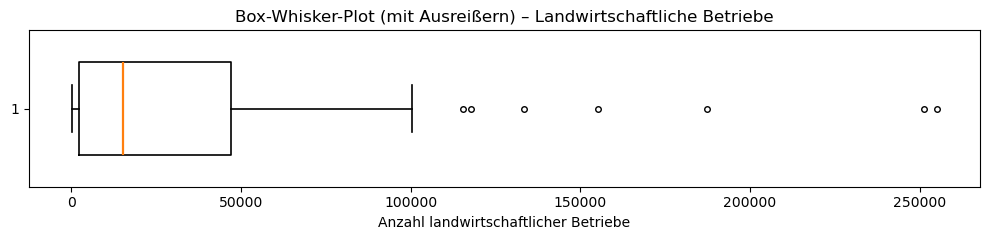

In [54]:
plt.figure(figsize=(10, 2.5))

plt.boxplot(
    df["Landwirtschaftliche Betriebe Anzahl"],
    vert=False,
    showfliers=True,
    widths=0.6,
    boxprops=dict(linewidth=1.2),
    whiskerprops=dict(linewidth=1.2),
    capprops=dict(linewidth=1.2),
    medianprops=dict(linewidth=1.6),
    flierprops=dict(marker='o', markersize=4, markerfacecolor='none')
)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe")
plt.title("Box-Whisker-Plot (mit Ausreißern) – Landwirtschaftliche Betriebe")

plt.tight_layout()
plt.savefig(
    "../figures/boxplot_betriebe_horizontal_mit_ausreissern.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


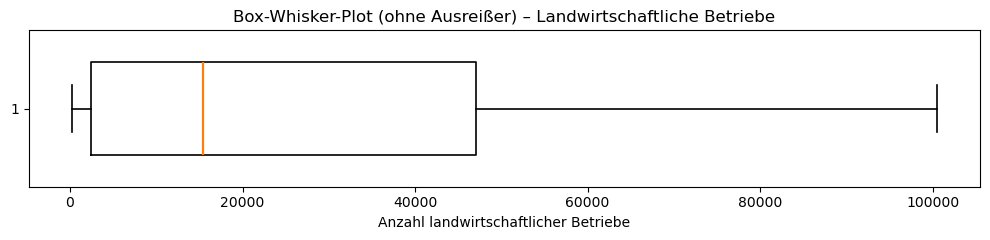

In [56]:
plt.figure(figsize=(10, 2.5))

plt.boxplot(
    df["Landwirtschaftliche Betriebe Anzahl"],
    vert=False,
    showfliers=False,
    widths=0.6,
    boxprops=dict(linewidth=1.2),
    whiskerprops=dict(linewidth=1.2),
    capprops=dict(linewidth=1.2),
    medianprops=dict(linewidth=1.6),
)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe")
plt.title("Box-Whisker-Plot (ohne Ausreißer) – Landwirtschaftliche Betriebe")

plt.tight_layout()
plt.savefig(
    "../figures/boxplot_betriebe_horizontal_ohne_ausreisser.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


**Interpretation:**  
Der vollständige Box-Whisker-Plot zeigt eine stark rechtsschiefe Verteilung mit
mehreren ausgeprägten Ausreißern nach oben.  
Die ergänzende Darstellung ohne Ausreißer ermöglicht eine bessere Beurteilung
der Lage und Streuung des zentralen Datenbereichs.  
Beide Darstellungen zusammen liefern ein vollständiges und differenziertes
Bild der Datenverteilung.



**Hinweis:**  
Für die nominalskalierte Variable *Bodennutzungsarten*
kann kein Box-Whisker-Plot erstellt werden,
da keine numerische Ordnung der Kategorien existiert.


## Grafische Darstellung: Scatterplot (R1.13)

Ein Scatterplot wird verwendet, um die Verteilung einer metrischen Variable
über die einzelnen Beobachtungen darzustellen.  
Da im vorliegenden Datensatz nur eine numerische Variable existiert,
wird die Beobachtungsnummer (Index) als unabhängige Variable verwendet.


### Scatterplot – Landwirtschaftliche Betriebe Anzahl

Der Scatterplot zeigt die Anzahl landwirtschaftlicher Betriebe
in Abhängigkeit von der Beobachtungsnummer.


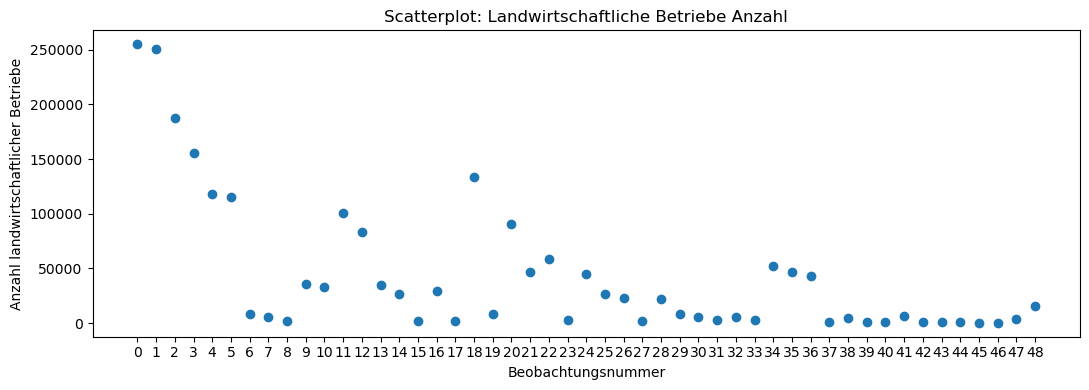

In [63]:
plt.figure(figsize=(11, 4))

plt.scatter(
    df.index,
    df["Landwirtschaftliche Betriebe Anzahl"]
)

plt.xlabel("Beobachtungsnummer")
plt.ylabel("Anzahl landwirtschaftlicher Betriebe")
plt.title("Scatterplot: Landwirtschaftliche Betriebe Anzahl")

# Mehr Skalenstriche auf der x-Achse
plt.xticks(range(0, len(df), 1))  # alle 2 Beobachtungen ein Tick

plt.tight_layout()
plt.savefig(
    "../figures/scatterplot_landwirtschaftliche_betriebe_anzahl.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()


**Interpretation:**  
Der Scatterplot verdeutlicht die starke Streuung der Anzahl landwirtschaftlicher
Betriebe über die einzelnen Beobachtungen hinweg.  
Ein klarer funktionaler Zusammenhang ist nicht erkennbar, was aufgrund der
Verwendung der Beobachtungsnummer als unabhängige Variable zu erwarten ist.
Die Darstellung dient primär der Visualisierung der Werteverteilung.


### Ergänzende Darstellung: Landwirtschaftliche Betriebe nach Bodennutzungsarten

Zur besseren inhaltlichen Einordnung der Daten wird ergänzend ein Balkendiagramm
erstellt, das die Anzahl landwirtschaftlicher Betriebe in Abhängigkeit von der
jeweiligen Bodennutzungsart darstellt.


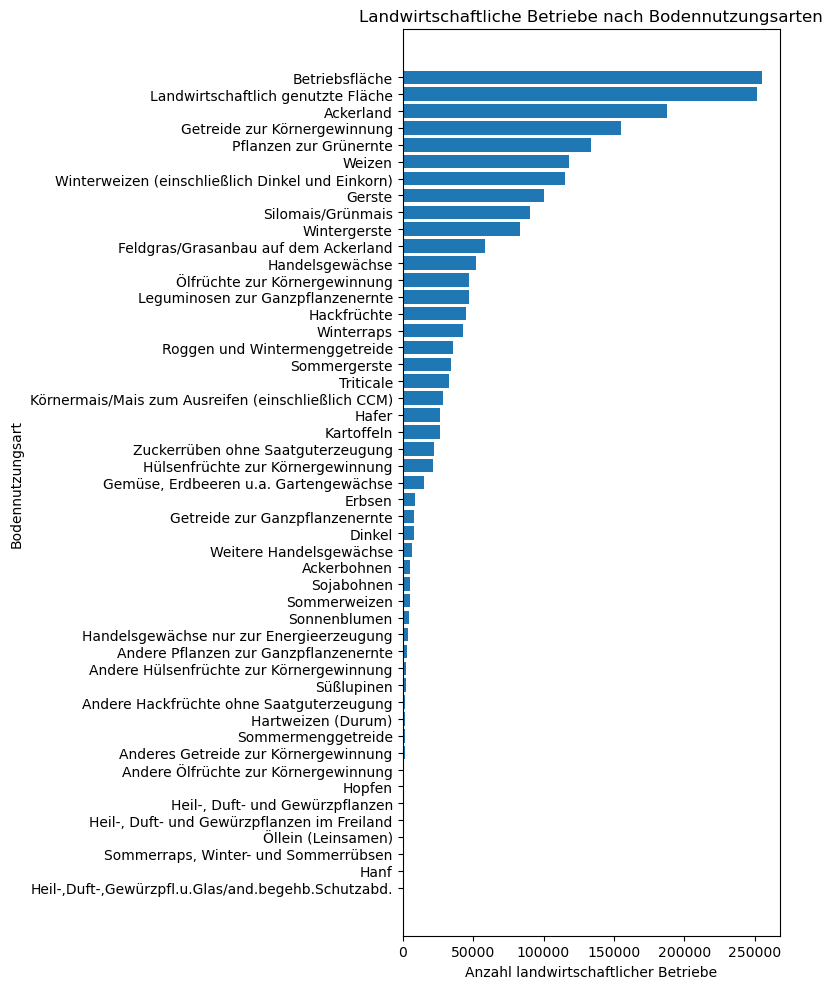

In [76]:
# Daten nach Anzahl landwirtschaftlicher Betriebe sortieren
df_sorted = df.sort_values(
    by="Landwirtschaftliche Betriebe Anzahl",
    ascending=True
)

plt.figure(figsize=(8, 10))

plt.barh(
    df_sorted["Bodennutzungsarten"],
    df_sorted["Landwirtschaftliche Betriebe Anzahl"]
)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe")
plt.ylabel("Bodennutzungsart")
plt.title("Landwirtschaftliche Betriebe nach Bodennutzungsarten")

plt.tight_layout()
plt.savefig(
    "../figures/balkendiagramm_betriebe_nach_bodennutzung.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()



**Interpretation:**  
Das Balkendiagramm verdeutlicht die starken Unterschiede in der Anzahl
landwirtschaftlicher Betriebe zwischen den einzelnen Bodennutzungsarten.
Insbesondere wenige Nutzungsarten weisen sehr hohe Werte auf, während der
Großteil der Kategorien deutlich niedrigere Fallzahlen besitzt.


## Zusammenfassende Beschreibung der Daten (R1.14)

Der vorliegende Datensatz beschreibt die Anzahl landwirtschaftlicher Betriebe
in Abhängigkeit von verschiedenen Bodennutzungsarten. Insgesamt umfasst der
Datensatz 49 Beobachtungen mit einer nominalskalierten Variablen
(*Bodennutzungsarten*) sowie einer metrischen Variablen
(*Landwirtschaftliche Betriebe Anzahl*).

Die Auswertung der Lageparameter zeigt, dass für die Variable
*Landwirtschaftliche Betriebe Anzahl* kein eindeutiger Modus existiert, da
alle Werte nur einmal im Datensatz vorkommen. Der arithmetische Mittelwert
liegt deutlich über dem Median, was auf eine stark rechtsschiefe Verteilung
der Daten hinweist. Diese Einschätzung wird durch die grafische Analyse
mittels Box-Whisker-Plot bestätigt.

Die Spannweite der Daten ist sehr groß, was auf erhebliche Unterschiede in der
Anzahl landwirtschaftlicher Betriebe zwischen den einzelnen Bodennutzungsarten
schließen lässt. Auch die mittlere Abweichung vom Median sowie die berechnete
Stichprobenvarianz weisen auf eine starke Streuung der Werte hin. Besonders
einige Bodennutzungsarten stellen ausgeprägte Ausreißer mit sehr hohen
Betriebszahlen dar.

Der Scatterplot verdeutlicht die Verteilung der Anzahl landwirtschaftlicher
Betriebe über die einzelnen Beobachtungen hinweg, ohne dass ein funktionaler
Zusammenhang erkennbar ist. Dies ist aufgrund der Verwendung der
Beobachtungsnummer als unabhängige Variable erwartungsgemäß.

Eine ergänzende grafische Darstellung in Form eines Balkendiagramms zeigt die
Anzahl landwirtschaftlicher Betriebe je Bodennutzungsart und macht die starken
Unterschiede zwischen den Kategorien deutlich. Insgesamt lässt sich
festhalten, dass die Daten durch eine stark ungleichmäßige Verteilung mit
wenigen sehr großen und vielen vergleichsweise kleinen Werten geprägt sind.


## Lage- und Streuungsparameter: Quartile und Dezile (R1.15)

Zur detaillierten Beschreibung der Verteilung werden die Quartile und Dezile
der metrischen Variable berechnet.


In [65]:
# Quartile
quartile = df["Landwirtschaftliche Betriebe Anzahl"].quantile([0.25, 0.5, 0.75])

# Dezile
dezile = df["Landwirtschaftliche Betriebe Anzahl"].quantile(
    [i / 10 for i in range(1, 10)]
)

quartile, dezile


(0.25     2430.0
 0.50    15410.0
 0.75    47110.0
 Name: Landwirtschaftliche Betriebe Anzahl, dtype: float64,
 0.1      1016.0
 0.2      1956.0
 0.3      3304.0
 0.4      5796.0
 0.5     15410.0
 0.6     28564.0
 0.7     44122.0
 0.8     68542.0
 0.9    120892.0
 Name: Landwirtschaftliche Betriebe Anzahl, dtype: float64)

In [66]:
quartile_dezile_tabelle = pd.DataFrame({
    "Quantil": list(quartile.index) + list(dezile.index),
    "Wert": list(quartile.values) + list(dezile.values)
})

quartile_dezile_tabelle


,Quantil,Wert
0,0.25,2430.0
1,0.50,15410.0
2,0.75,47110.0
3,0.10,1016.0
4,0.20,1956.0
5,0.30,3304.0
6,0.40,5796.0
7,0.50,15410.0
8,0.60,28564.0
9,0.70,44122.0


**Interpretation:**  
Die Quartile und Dezile verdeutlichen die starke Konzentration der Daten im
unteren Wertebereich. Ein Großteil der Beobachtungen liegt deutlich unterhalb
des arithmetischen Mittelwertes, was die rechtsschiefe Verteilung bestätigt.


## Streuungsmaß: Quartilsabstand (R1.16)

Der Quartilsabstand beschreibt die Spannweite der mittleren 50 % der Daten
und ist robust gegenüber Ausreißern.


In [67]:
# Quartilsabstand
q1 = quartile.loc[0.25]
q3 = quartile.loc[0.75]
quartilsabstand = q3 - q1

quartilsabstand


np.float64(44680.0)

In [68]:
quartilsabstand_tabelle = pd.DataFrame({
    "Kennzahl": ["1. Quartil (Q1)", "3. Quartil (Q3)", "Quartilsabstand"],
    "Wert": [q1, q3, quartilsabstand]
})

quartilsabstand_tabelle


,Kennzahl,Wert
0,1. Quartil (Q1),2430.0
1,3. Quartil (Q3),47110.0
2,Quartilsabstand,44680.0


**Interpretation:**  
Der Quartilsabstand zeigt, dass die mittleren 50 % der Werte vergleichsweise
eng beieinander liegen, während die Gesamtstreuung stark durch Ausreißer
beeinflusst wird.


## Kovarianz (R1.17)

Die Kovarianz beschreibt den gemeinsamen linearen Zusammenhang zwischen zwei
metrischen Variablen.


**Hinweis:**  
Da der vorliegende Datensatz nur eine metrische Variable enthält,
kann keine Kovarianz berechnet werden.


## Korrelationskoeffizient (R1.18)

Der Korrelationskoeffizient nach Pearson misst Stärke und Richtung eines
linearen Zusammenhangs zwischen zwei metrischen Variablen.


**Hinweis:**  
Mangels einer zweiten metrischen Variable ist die Berechnung eines
Korrelationskoeffizienten im vorliegenden Datensatz nicht möglich.


## Klasseneinteilung und Histogramm (R1.19)

Für die metrische Variable **Landwirtschaftliche Betriebe Anzahl** wird eine
sinnvolle Klasseneinteilung definiert und ein Histogramm erstellt.

Da die Daten stark rechtsschief verteilt sind (viele kleine Werte, wenige sehr große Werte),
werden im unteren Wertebereich kleinere Klassenbreiten gewählt und im oberen Wertebereich
größere Klassenbreiten, um sowohl den zentralen Datenbereich als auch die Ausreißer sinnvoll
darzustellen.



In [91]:
# Explizite Klassengrenzen (in Anzahl Betriebe)
# Feiner unten, gröber oben (wegen starker Rechtsschiefe)
bins = [0, 5000, 10000, 20000, 50000, 100000, 150000, 200000, 260000]

bins
# Klassenzuordnung (linke Grenze inkl., rechte exkl., letzte inkl.)
klassen = pd.cut(
    df["Landwirtschaftliche Betriebe Anzahl"],
    bins=bins,
    right=False,
    include_lowest=True
)

# Häufigkeiten pro Klasse
klassen_haeufigkeit = klassen.value_counts().sort_index()

# Tabelle: Klassen + Häufigkeiten
klassen_tabelle = pd.DataFrame({
    "Klasse": klassen_haeufigkeit.index.astype(str),
    "Häufigkeit": klassen_haeufigkeit.values
})
# Absolute Häufigkeiten
klassen_haeufigkeit = klassen.value_counts().sort_index()

# Relative Häufigkeiten
relative_haeufigkeit = klassen_haeufigkeit / klassen_haeufigkeit.sum()

# Tabelle: Klassen, absolute und relative Häufigkeiten
klassen_tabelle = pd.DataFrame({
    "Klasse": klassen_haeufigkeit.index.astype(str),
    "Absolute Häufigkeit": klassen_haeufigkeit.values,
    "Relative Häufigkeit": relative_haeufigkeit.values
})

klassen_tabelle["Relative Häufigkeit"] = (
    klassen_tabelle["Relative Häufigkeit"] * 100
).round(2)


klassen_tabelle





,Klasse,Absolute Häufigkeit,Relative Häufigkeit
0,"[0, 5000)",17,34.69
1,"[5000, 10000)",7,14.29
2,"[10000, 20000)",1,2.04
3,"[20000, 50000)",12,24.49
4,"[50000, 100000)",4,8.16
5,"[100000, 150000)",4,8.16
6,"[150000, 200000)",2,4.08
7,"[200000, 260000)",2,4.08


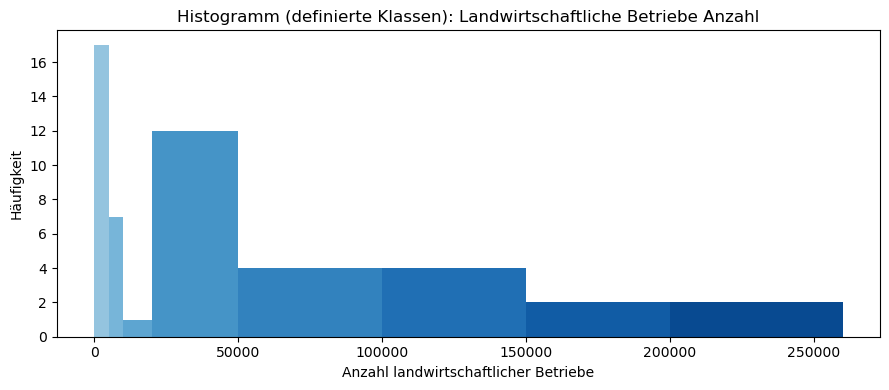

In [82]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(9, 4))

# Histogramm zeichnen und Balken abfangen
counts, bin_edges, patches = plt.hist(
    df["Landwirtschaftliche Betriebe Anzahl"],
    bins=bins
)

# Dezente Farbpalette (eine Farbe pro Klasse)
farben = plt.cm.Blues(
    np.linspace(0.4, 0.9, len(patches))
)

# Farben auf Klassen anwenden
for patch, color in zip(patches, farben):
    patch.set_facecolor(color)

plt.xlabel("Anzahl landwirtschaftlicher Betriebe")
plt.ylabel("Häufigkeit")
plt.title("Histogramm (definierte Klassen): Landwirtschaftliche Betriebe Anzahl")

plt.tight_layout()
plt.savefig(
    "../figures/histogramm_landwirtschaftliche_betriebe_klasseneinteilung_farbig.png",
    dpi=300,
    bbox_inches="tight"
)
plt.show()



**Begründung der Klasseneinteilung:**  
Die gewählten Klassen sind im unteren Wertebereich enger (0–5k, 5–10k, 10–20k),
da dort der Großteil der Beobachtungen liegt. Für höhere Werte wurden breitere
Klassen (z. B. 50k–100k, 100k–150k, …) gewählt, da dort deutlich weniger Werte
vorliegen und ansonsten viele Klassen leer wären. Dadurch bleibt das Histogramm
interpretierbar und zeigt sowohl den zentralen Bereich als auch die Ausreißer.

**Interpretation:**  
Das Histogramm bestätigt die stark rechtsschiefe Verteilung: viele Beobachtungen
liegen in den unteren Klassen, während nur wenige Bodennutzungsarten sehr hohe
Betriebszahlen aufweisen.


## Kontingenztabelle (R1.20)

Eine Kontingenztabelle dient zur Darstellung der gemeinsamen Häufigkeitsverteilung
zweier kategorialer Variablen.

Im vorliegenden Datensatz ist jedoch nur eine kategoriale Variable
(*Bodennutzungsarten*) vorhanden. Da keine zweite kategoriale Variable existiert,
kann keine Kontingenztabelle erstellt werden.


## Rangkorrelationskoeffizient nach Spearman (R1.21)

Der Rangkorrelationskoeffizient nach Spearman misst den monotonen Zusammenhang
zwischen zwei ordinalen oder metrischen Variablen auf Basis ihrer Ränge.

Da der vorliegende Datensatz nur eine metrische Variable enthält und keine zweite
geeignete Variable für einen Rangvergleich vorhanden ist, kann der
Rangkorrelationskoeffizient nach Spearman nicht berechnet werden.
